In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Initialize dictionary
myDictionary = {
    "Michael": "Management",
    "Dwight": "Sales",
    "Jim": "Sales",
    "Pam": "Reception",
    "Oscar": "Accounting"
}

# Update Pam's department to 'Sales'
myDictionary["Pam"] = "Sales"

# Hire Peter into the Reception department
myDictionary["Peter"] = "Reception"

# Output keys and values from myDictionary
print("Keys and Values in myDictionary:")
for name, department in myDictionary.items():
    print(f"{name}: {department}")

# Create a new dictionary with departments as keys and personnel as values
department_dict = {}
for name, department in myDictionary.items():
    if department not in department_dict:
        department_dict[department] = []
    department_dict[department].append(name)

# Display the new dictionary
print("\nNew dictionary with departments as keys:")
print(department_dict)

Keys and Values in myDictionary:
Michael: Management
Dwight: Sales
Jim: Sales
Pam: Sales
Oscar: Accounting
Peter: Reception

New dictionary with departments as keys:
{'Management': ['Michael'], 'Sales': ['Dwight', 'Jim', 'Pam'], 'Accounting': ['Oscar'], 'Reception': ['Peter']}


In [3]:
# Create list 
myList = list(myDictionary.keys())

# Output list
print("Initial myList:")
print(myList)

# Remove Michael
myList.remove("Michael")

# Print each element of myList on its own line
print("\nUpdated myList after Michael's resignation:")
for person in myList:
    print(person)

Initial myList:
['Michael', 'Dwight', 'Jim', 'Pam', 'Oscar', 'Peter']

Updated myList after Michael's resignation:
Dwight
Jim
Pam
Oscar
Peter


In [4]:
df = pd.read_csv('California Housing.csv')
print("Data types of coulmns:\n", df.dtypes)
print("\nOriginal last five rows:\n", df.tail(), "\n")

def add_random_rows(df, num_rows=5):
    """Generate and append random rows to the DataFrame with appropriate data types."""
    new_data = pd.DataFrame({
        "MedInc": np.random.uniform(1.0, 15.0, num_rows),
        "HouseAge": np.random.randint(1, 52, num_rows),
        "AveRooms": np.random.uniform(1.0, 10.0, num_rows),
        "AveBedrms": np.random.uniform(1.0, 5.0, num_rows),
        "Population": np.random.randint(100, 10000, num_rows),
        "AveOccup": np.random.uniform(1.0, 6.0, num_rows),
        "Latitude": np.random.uniform(32.0, 42.0, num_rows),
        "Longitude": np.random.uniform(-125.0, -115.0, num_rows)
    })

    # Append the new data and return the updated DataFrame
    return pd.concat([df, new_data], ignore_index=True)

# Update the DataFrame with five random rows
df = add_random_rows(df)

print("Updated DataFrame with 5 random rows:\n")
print(df.tail())

Data types of coulmns:
 MedInc        float64
HouseAge        int64
AveRooms      float64
AveBedrms     float64
Population      int64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

Original last five rows:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603        25  5.045455   1.133333         845  2.560606     39.48   
20636  2.5568        18  6.114035   1.315789         356  3.122807     39.49   
20637  1.7000        17  5.205543   1.120092        1007  2.325635     39.43   
20638  1.8672        18  5.329513   1.171920         741  2.123209     39.43   
20639  2.3886        16  5.254717   1.162264        1387  2.616981     39.37   

       Longitude  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24   

Updated DataFrame with 5 random rows:

          MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
20640   3.357921        29  2.939723   1.366594   

In [5]:
# For loop in zip, columns
df['Description'] = [
    f"On average, houses in this block group have {house_age} years of age, {ave_rooms:.2f} rooms, and {ave_bedrms:.2f} bedrooms."
    for house_age, ave_rooms, ave_bedrms in zip(df['HouseAge'], df['AveRooms'], df['AveBedrms'])
]

# Display the updated DataFrame
print("Updated DataFrame with Description column:")
print(df[['HouseAge', 'AveRooms', 'AveBedrms', 'Description']].tail())

Updated DataFrame with Description column:
       HouseAge  AveRooms  AveBedrms  \
20640        29  2.939723   1.366594   
20641        27  3.072159   2.781440   
20642        29  3.754494   3.437671   
20643        38  3.305323   4.952827   
20644        32  8.605088   2.535648   

                                             Description  
20640  On average, houses in this block group have 29...  
20641  On average, houses in this block group have 27...  
20642  On average, houses in this block group have 29...  
20643  On average, houses in this block group have 38...  
20644  On average, houses in this block group have 32...  


In [6]:
def categorize_features(df, output_category="continuous"):
    # Initialize lists for each category
    non_numeric = []
    discrete = []
    continuous = []
    
    # Iterate over each column in the DataFrame
    for column in df.columns:
        if df[column].dtype == 'object':
            # If the column is of type 'object', consider it non-numeric (string-like)
            non_numeric.append(column)
        elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
            # If the column is numeric, determine if it's discrete or continuous
            if df[column].nunique() < 20:
                discrete.append(column)  # Discrete if it has fewer unique values
            else:
                continuous.append(column)  # Continuous if it has more unique values

    # Return the appropriate list based on the output_category
    if output_category == "non_numeric":
        return non_numeric
    elif output_category == "discrete":
        return discrete
    elif output_category == "continuous":
        return continuous
    elif output_category == "all":
        return {"non_numeric": non_numeric, "discrete": discrete, "continuous": continuous}
    else:
        raise ValueError("Invalid output_category. Choose from 'non_numeric', 'discrete', 'continuous', or 'all'.")

# Test the function with the California Housing DataFrame
df = pd.read_csv('California Housing.csv')

#continuous features
print("Continuous Features:")
print(categorize_features(df, "continuous"))

# all feature categories
print("\nAll Feature Categories:")
print(categorize_features(df, "all"))

# only non-numeric features
print("\nNon-Numeric Features:")
print(categorize_features(df, "non_numeric"))

Continuous Features:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

All Feature Categories:
{'non_numeric': [], 'discrete': [], 'continuous': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']}

Non-Numeric Features:
[]


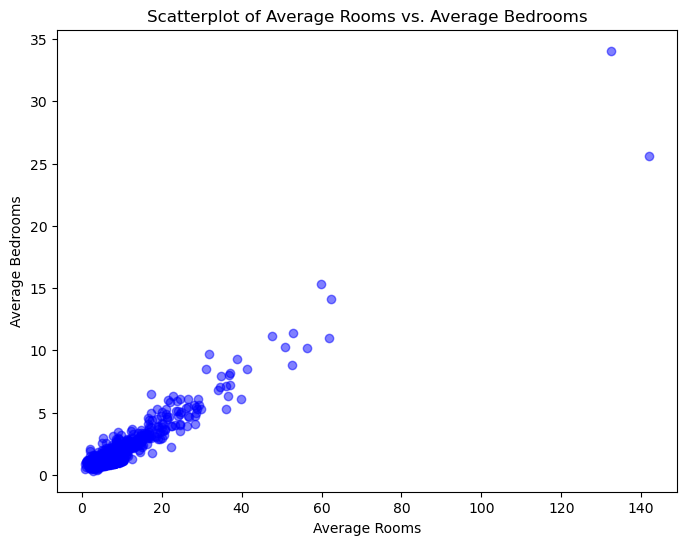

In [7]:
# Create the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['AveRooms'], df['AveBedrms'], color='blue', alpha=0.5)

# Label the axes and the plot
plt.title('Scatterplot of Average Rooms vs. Average Bedrooms')
plt.xlabel('Average Rooms')
plt.ylabel('Average Bedrooms')

# Show the plot
plt.show()